# Abrindo uma imagem

In [8]:
import cv2
import matplotlib.pyplot as plt

In [9]:
image = cv2.imread("imagens/px-girl.jpg")

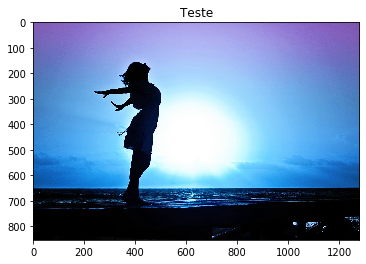

In [14]:
plt.title("Imagem")
plt.imshow(image)

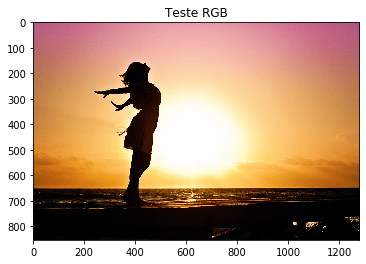

In [15]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title("Imagem RGB")
plt.imshow(image_rgb)

In [17]:
image_rgb.shape

(853, 1280, 3)

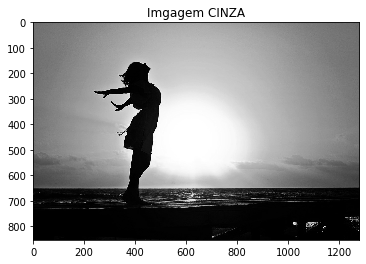

In [20]:
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.title("Imgagem CINZA")
plt.imshow(image_gray, cmap="gray")

In [21]:
imagem_gray.shape

(853, 1280)

# Definindo um ponto de interesse - ROI 

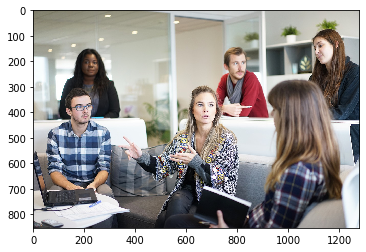

In [22]:
imagem = cv2.imread("imagens/px-people.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(imagem)

In [23]:
imagem.shape

(853, 1280, 3)

In [24]:
image_roi = imagem[100:200, 1000:1200]

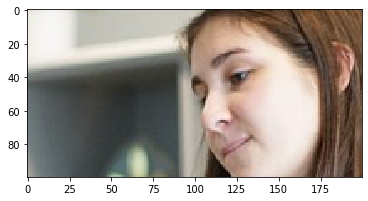

In [25]:
plt.imshow(image_roi)

In [27]:
cv2.imwrite("image_roi.png", imagem_roi)

True

In [28]:
imagem_roi_bgr = cv2.cvtColor(imagem_roi, cv2.COLOR_RGB2BGR) #todo comando original do cv2 utiliza o esquema de cores bgr
cv2.imwrite("image_roi.png", imagem_roi_bgr)

True

(660, 995, 3)

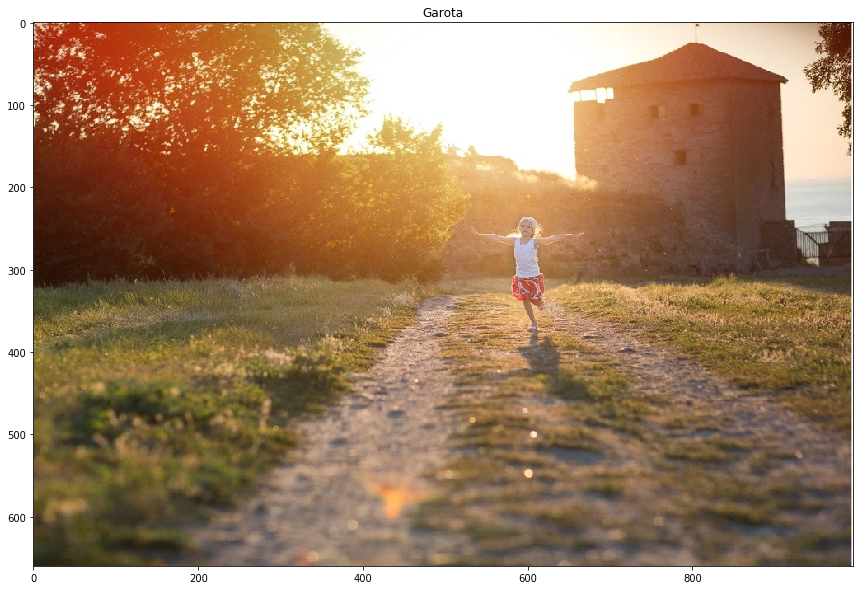

In [97]:
image = cv2.imread("imagens/little-girl.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.title("Garota")
plt.imshow(image)
image.shape


In [98]:
image_roi = image[230:380, 530:670]

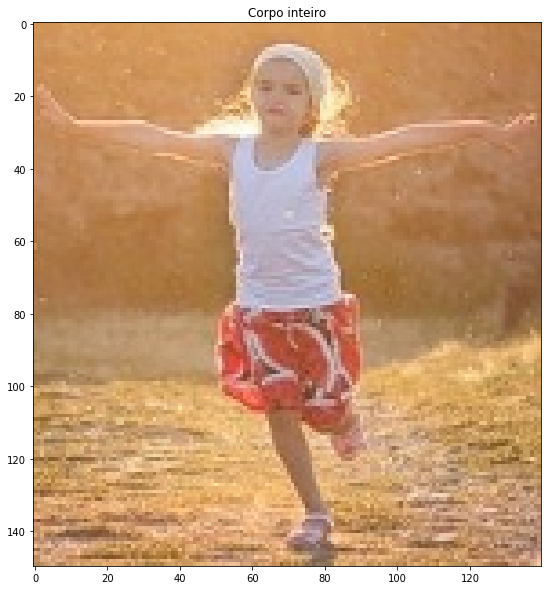

In [99]:
plt.figure(figsize=(20,10))
plt.title("Corpo inteiro")
plt.imshow(image_roi)

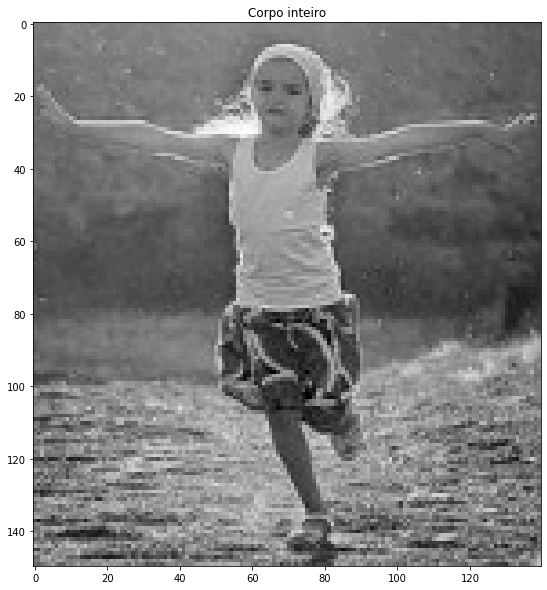

In [100]:
image_roi_gray = cv2.cvtColor(image_roi, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(20,10))
plt.title("Corpo inteiro")
plt.imshow(image_roi_gray, cmap="gray")

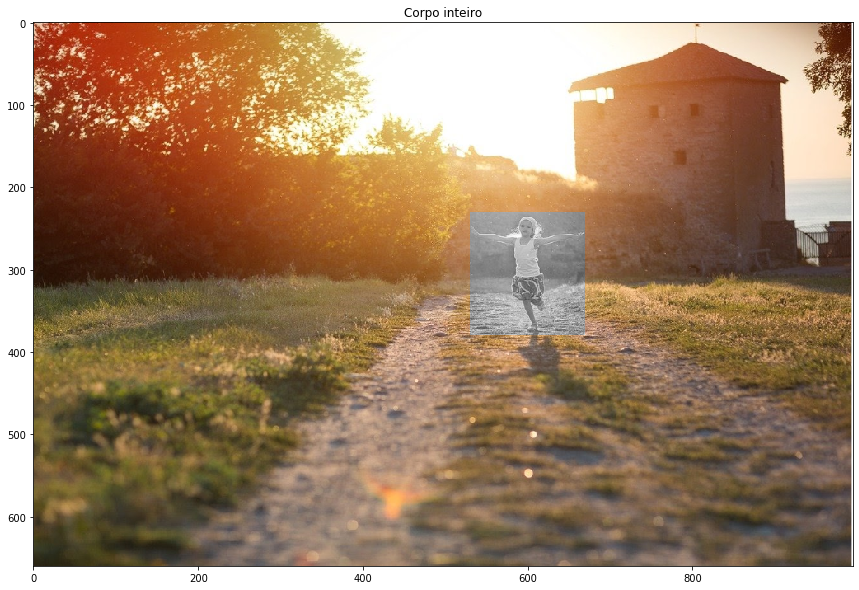

In [102]:
image_roi_rgb = cv2.cvtColor(image_roi_gray, cv2.COLOR_GRAY2RGB)
image[230:380, 530:670] = image_roi_rgb
plt.figure(figsize=(20,10))
plt.title("Corpo inteiro")
plt.imshow(image)

# Classificador de cascata de Haar

In [103]:
import cv2
import matplotlib.pyplot as plt

In [104]:
image = cv2.imread("imagens/px-people.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

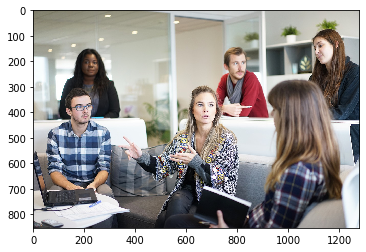

In [106]:
plt.imshow(image)

In [107]:
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [118]:
classificador = cv2.CascadeClassifier("classificadores/haarcascade_frontalface_default.xml") #classificador especializado em rostos frontais

In [119]:
faces = classificador.detectMultiScale(image_gray, 1.3, 5)

In [123]:
len(faces)

5

In [124]:
print(faces)

[[1088  102  101  101]
 [ 619  327  114  114]
 [ 189  176   75   75]
 [ 767  176   84   84]
 [ 150  337  102  102]]


In [125]:
image_copy = image.copy()

In [126]:
for (x,y,w,h) in faces:
    cv2.rectangle(image_copy, (x,y), (x+w, y+h), (255, 255, 0), 2)

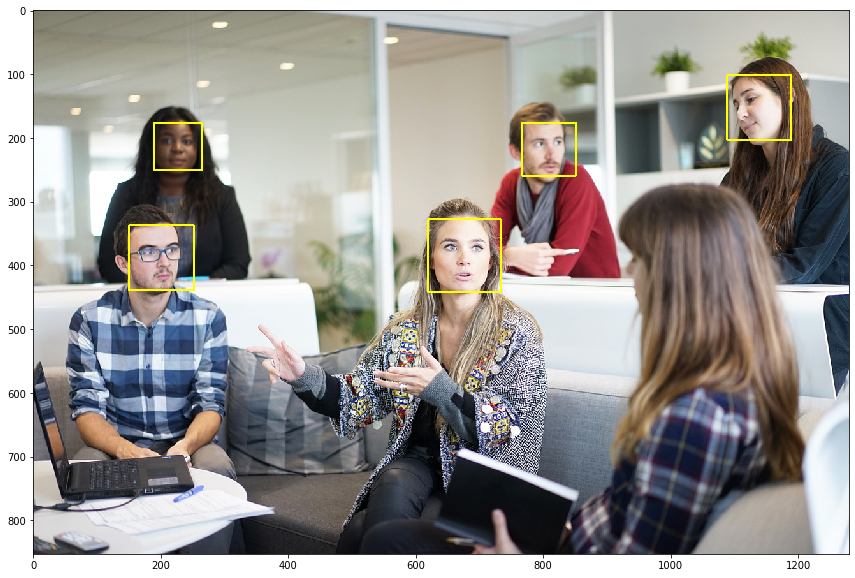

In [128]:
plt.figure(figsize=(20, 10))
plt.imshow(image_copy)

In [131]:
face_image = 0

for (x,y,w,h) in faces:
    face_image += 1
    image_roi = image[y:y+h, x:x+w]
    image_roi = cv2.cvtColor(image_roi, cv2.COLOR_RGB2BGR)
    cv2.imwrite("face_" + str(face_image) + ".png", image_roi)
    